<a href="https://colab.research.google.com/github/shouwiz/Foundations-In-MLP/blob/main/DSE_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [119]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [120]:
data.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [121]:
test_data.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [122]:
data.dtypes ,
test_data.dtypes

,0
id,int64
Time_spent_Alone,float64
Stage_fear,object
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,object
Friends_circle_size,float64
Post_frequency,float64


In [123]:
data['Stage_fear']

,Stage_fear
0,No
1,No
2,Yes
3,No
4,No
...,...
18519,No
18520,NaN
18521,Yes
18522,Yes


In [124]:
data['Personality']

,Personality
0,Extrovert
1,Extrovert
2,Introvert
3,Extrovert
4,Extrovert
...,...
18519,Extrovert
18520,Extrovert
18521,Introvert
18522,Introvert


In [125]:
data['Personality'].unique()

array(['Extrovert', 'Introvert'], dtype=object)

In [126]:
data['Stage_fear'].unique()

array(['No', 'Yes', nan], dtype=object)

In [127]:
data.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [128]:
data.shape #rows,columns

(18524, 9)

In [129]:
#### Visualizing

<Axes: >

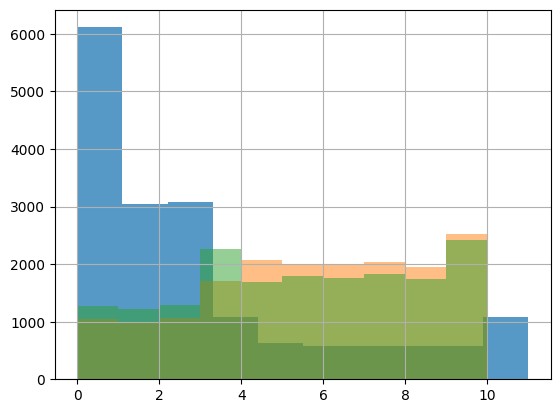

In [130]:
data['Time_spent_Alone'].hist(bins=10, alpha=0.75)
data['Social_event_attendance'].hist(bins=10, alpha=0.5) #from 4 to 10 people don't like to go to social events but go due to peersdata
data['Post_frequency'].hist(bins=10,alpha = 0.5)

<Axes: >

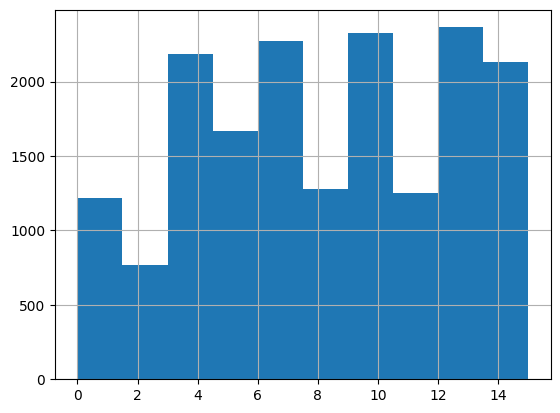

In [131]:
data['Friends_circle_size'].hist(bins=10)

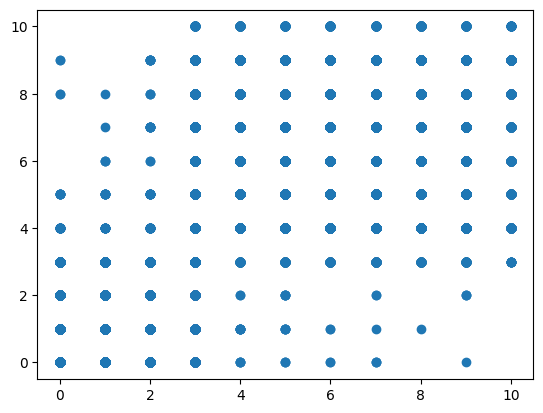

In [132]:
plt.scatter(data['Post_frequency'], data['Social_event_attendance'])

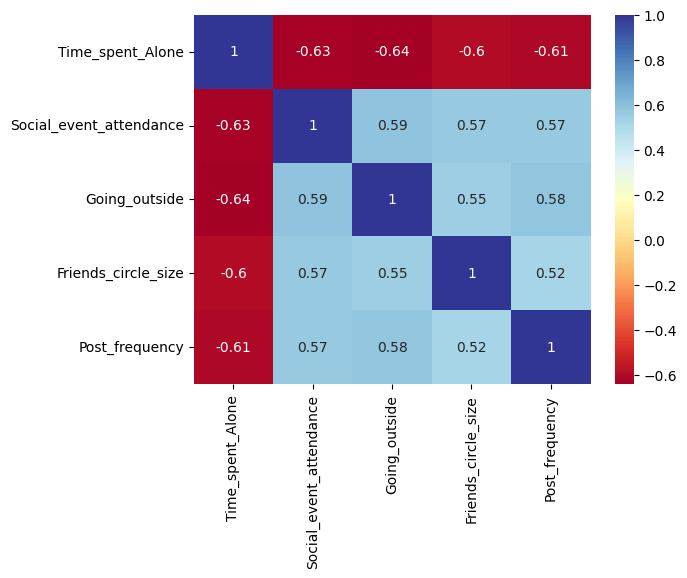

In [133]:
sns.heatmap(data.drop(columns=["Stage_fear","Drained_after_socializing","Personality","id"]).corr(), cmap='RdYlBu', annot= True)
plt.show()

In [134]:
data.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [135]:
data['Stage_fear'] = data['Stage_fear'].map({'Yes' : 1, 'No' : 0})
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'Yes' : 1, 'No' : 0,})
data['Personality'] = data['Personality'].map({'Introvert' : 1, 'Extrovert' : 0})

In [136]:
data.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,0
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,0
2,2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,1
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,0
4,4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,0


In [137]:
test_data['Stage_fear'] = test_data['Stage_fear'].map({'Yes' : 1, 'No' : 0})
test_data['Drained_after_socializing'] = test_data['Drained_after_socializing'].map({'Yes' : 1, 'No' : 0,})

test_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,0.0,7.0,4.0,0.0,6.0,NaN
1,18525,NaN,1.0,0.0,0.0,1.0,5.0,1.0
2,18526,3.0,0.0,5.0,6.0,0.0,15.0,9.0
3,18527,3.0,0.0,4.0,4.0,0.0,5.0,6.0
4,18528,9.0,1.0,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,0.0,5.0,5.0,0.0,9.0,6.0
6171,24695,8.0,1.0,2.0,1.0,1.0,0.0,0.0
6172,24696,2.0,0.0,4.0,3.0,0.0,9.0,7.0
6173,24697,3.0,0.0,4.0,4.0,0.0,11.0,9.0


Preprocessing

In [138]:
x = data.drop(columns=["Personality"])
y = data['Personality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=66)

In [139]:
x_train.shape

(3704, 8)

In [140]:
x_train.isna().sum()

,0
id,0
Time_spent_Alone,243
Stage_fear,372
Social_event_attendance,236
Going_outside,305
Drained_after_socializing,227
Friends_circle_size,196
Post_frequency,241


In [141]:
print(x_train)

          id  Time_spent_Alone  Stage_fear  Social_event_attendance  \
11912  11912               3.0         0.0                      5.0   
1247    1247               3.0         0.0                      5.0   
7632    7632               3.0         0.0                      5.0   
13686  13686               3.0         0.0                      8.0   
5865    5865               2.0         0.0                      8.0   
...      ...               ...         ...                      ...   
9165    9165               7.0         1.0                      0.0   
5199    5199               2.0         0.0                      7.0   
18125  18125               0.0         0.0                      4.0   
8243    8243               3.0         0.0                      8.0   
8823    8823               3.0         NaN                      7.0   

       Going_outside  Drained_after_socializing  Friends_circle_size  \
11912            6.0                        0.0                  9.0   
124

#### Prunning


In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
treemodel = DecisionTreeClassifier(max_depth= 4)

In [144]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.49107142857142855, 0.9, 'x[5] <= 0.5\ngini = 0.372\nsamples = 3704\nvalue = [2788, 916]'),
 Text(0.26785714285714285, 0.7, 'x[1] <= 7.5\ngini = 0.039\nsamples = 2695\nvalue = [2642.0, 53.0]'),
 Text(0.3794642857142857, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[3] <= 0.5\ngini = 0.035\nsamples = 2686\nvalue = [2638, 48]'),
 Text(0.07142857142857142, 0.3, 'x[1] <= 4.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.3, 'x[4] <= 4.5\ngini = 0.034\nsamples = 2683\nvalue = [2636, 47]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.015\nsamples = 1191\nvalue = [1182, 9]'),
 Text(0.25, 0.1, 'gini = 0.05\nsamples = 1492\nvalue = [1454, 38]'),
 Text(0.39285714285714285, 0.5, 'x[6] <= 5.0\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.35714285714285715, 0.3, 'x[4] <= inf\ngini = 0.278\nsamples = 6\nv

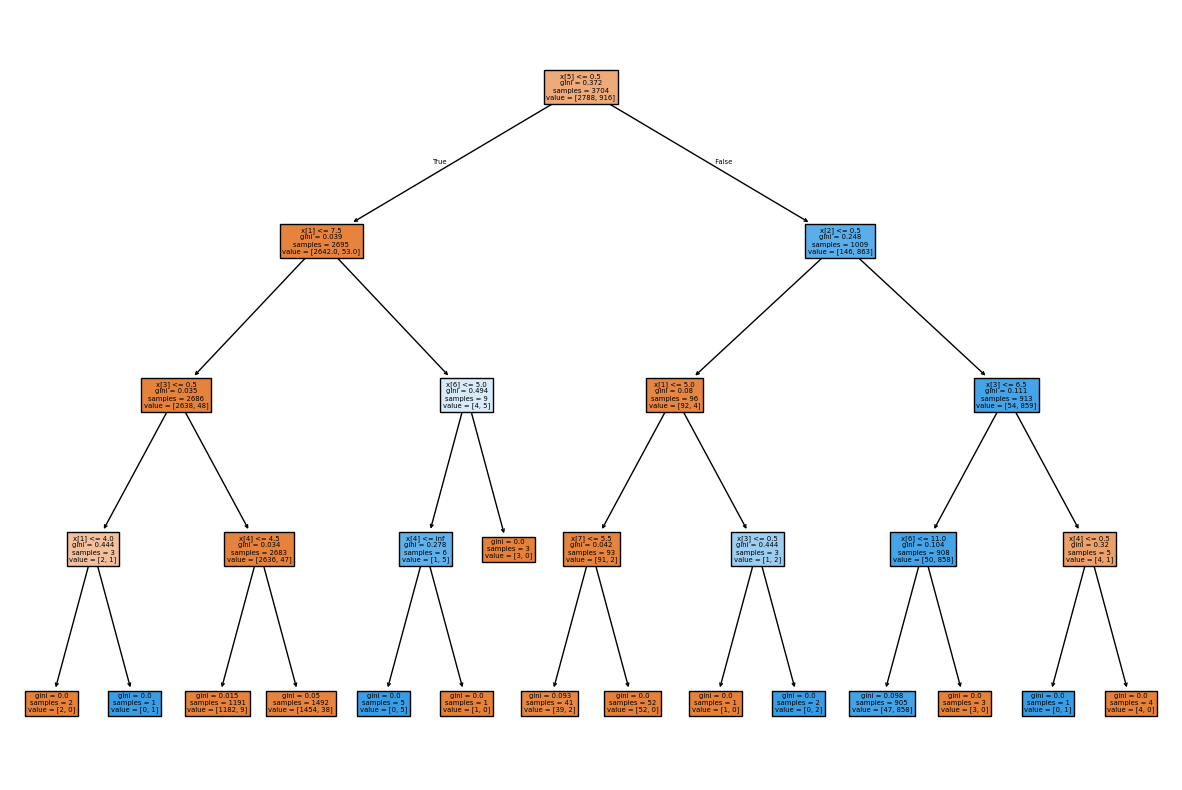

In [145]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(treemodel,filled=True)

In [146]:
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [147]:

from sklearn.model_selection import GridSearchCV

In [148]:
treemodel = DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [149]:
cv.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [150]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [151]:
cv.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
y_pred = cv.predict(x_test)

In [153]:
from sklearn.metrics import accuracy_score, classification_report

In [154]:
score = accuracy_score(y_pred,y_test)
score

0.9674763832658569

In [155]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10955
           1       0.93      0.94      0.94      3865

    accuracy                           0.97     14820
   macro avg       0.96      0.96      0.96     14820
weighted avg       0.97      0.97      0.97     14820

